In [74]:
import pandas as pd
from scipy import  stats
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("house_price.csv", encoding = "ISO-8859-1")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [75]:
df.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long
count,665.000000,6.170000e+02,671.000000,240.000000,320.00000,366.000000,671.000000,671.000000
mean,103.763534,2.892758e+04,44259.903130,3.645833,4.31875,4.762295,21.015733,105.825550
std,471.861867,1.464474e+05,58.280392,2.349126,2.58976,1.676853,0.006517,0.009011
min,0.000000,4.500000e+00,44197.000000,1.000000,1.00000,1.000000,20.998499,105.795544
25%,39.000000,3.950000e+03,44197.000000,2.000000,3.00000,4.000000,21.011094,105.822605
50%,55.000000,8.900000e+03,44292.000000,4.000000,4.00000,5.000000,21.018072,105.828985
75%,80.000000,2.150000e+04,44312.000000,4.250000,6.00000,5.000000,21.018777,105.829949
max,11000.000000,3.300000e+06,44325.000000,16.000000,22.00000,11.000000,21.036845,105.841407


In [15]:
df = df.dropna(subset=['area','price'])
df.shape


(615, 12)

In [3]:
df.property_type.unique()

array(['trong ngo', 'mat pho'], dtype=object)

In [4]:
df_in = df[df['property_type']=='trong ngo']

df_in_price = df_in['price'].tolist()

df_out =df[df['property_type'] == 'mat pho']

df_out_price = df_out['price'].tolist()

Price_in = {'Price_in':df_in_price}

Price_out = {'Price_out':df_out_price}


In [5]:
df_in_price = pd.DataFrame(Price_in)
df_in_price

,Price_in
0,14700.0
1,4200.0
2,11000.0
3,2900.0
4,3950.0
...,...
444,32000.0
445,15800.0
446,10200.0
447,3900.0


In [7]:
df_out_price = pd.DataFrame(Price_out)
df_out_price

,Price_out
0,12500.0
1,36000.0
2,13500.0
3,13000.0
4,29000.0
...,...
217,23500.0
218,17500.0
219,17500.0
220,24800.0


In [21]:
df_in.shape

(406, 12)

In [8]:
df_out.shape 
df_out.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
449,35.0,12500.0,44246,So do,NaN,NaN,NaN,NaN,6.0,21.008930,105.824105,mat pho
450,70.0,36000.0,44268,So do,NaN,NaN,NaN,6.0,5.0,21.009239,105.824230,mat pho
451,41.0,13500.0,44290,So do,NaN,NaN,5.0,3.0,6.0,21.009239,105.824230,mat pho
452,50.0,13000.0,44292,So do,NaN,NaN,5.0,4.0,5.0,21.014612,105.819296,mat pho
453,75.0,29000.0,44292,So do,NaN,NaN,4.0,4.0,5.0,21.020312,105.808328,mat pho


In [9]:
df1 = pd.concat([df_in_price,df_out_price],axis=1)
df1.dropna()
df1.shape

(449, 2)

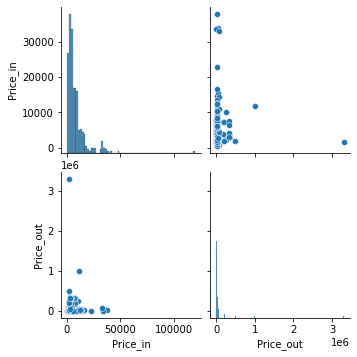

In [11]:
sns.pairplot(df1)

In [13]:
df_in_price

,Price_in
0,14700.0
1,4200.0
2,11000.0
3,2900.0
4,3950.0
...,...
444,32000.0
445,15800.0
446,10200.0
447,3900.0


In [24]:
df1

,Price_in,Price_out
0,14700.0,12500.0
1,4200.0,36000.0
2,11000.0,13500.0
3,2900.0,13000.0
4,3950.0,29000.0
...,...,...
444,32000.0,NaN
445,15800.0,NaN
446,10200.0,NaN
447,3900.0,NaN


Phát biểu:
+ H0:Giá mặt phố cáo hơn giá nhà trong ngõ
+ H1: Giá mặt phố thấp hơn giá nhà trong ngõ




In [30]:
from scipy import  stats

print(stats.ttest_ind(df1['Price_out'],df1['Price_in'],equal_var=False,nan_policy='omit'))

Ttest_indResult(statistic=3.594406454554795, pvalue=0.0004054392192163205)


In [33]:
df1.describe()

,Price_in,Price_out
count,407.000000,2.100000e+02
mean,8143.431450,6.920924e+04
std,9465.849714,2.461018e+05
min,450.000000,4.500000e+00
25%,3100.000000,1.500000e+04
50%,5300.000000,2.480000e+04
75%,9350.000000,4.100000e+04
max,120000.000000,3.300000e+06


Kết luận: Chưa đủ cơ sở để kết luận Giá mặt phố cao hơn giá nhà

2. kIỂM ĐỊNH GIẢ THUYẾT GIÁ NHÀ KHÔNG CÓ THÔNG TIN PHÁP KÝ THẤP HƠN NHÀ CÓ THÔNG TIN PHÁP KÝ

In [79]:
# df  = df.land_certificate.fillna(0)
# df['land_certificate'].unique()

df['land_certificate']= df['land_certificate'].fillna(0)
df

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,0,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,0,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,0,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


Phát biểu giả thuyết:
    + H0: Giá nhà không có thông tyin phát lý thấp hơn giá nhà xcos thông tin pháp lý
    + H1: Giá nhà 

In [99]:
certif = df[df['land_certificate']=='So do']['price']
non_certif= df[df['land_certificate']== 0]['price']

certif = {'certif':certif}

non_certif = {'non_certif': non_certif}

certif = pd.DataFrame(certif)

non_certif = pd.DataFrame(non_certif)

df2 = pd.concat([certif,non_certif])

df2.shape

(671, 2)

In [104]:
df2.head()
df2.describe()

,certif,non_certif
count,359.000000,2.580000e+02
mean,20226.536490,4.103484e+04
std,42972.007898,2.204098e+05
min,450.000000,4.500000e+00
25%,3800.000000,4.200000e+03
50%,9300.000000,8.275000e+03
75%,21500.000000,2.175000e+04
max,350000.000000,3.300000e+06


In [105]:
from scipy import  stats

print(stats.ttest_ind(df2['non_certif'],df2['certif'],equal_var=False,nan_policy='omit'))

Ttest_indResult(statistic=1.4961098102718489, pvalue=0.13578831996121019)


Kết luận: Chưa đủ cơ sở để kết luận giả thuyết H0 là đúng, chấp nhận giả thuyết H1